### The Impact of Large Sample Sizes

When we increase our sample size, even the smallest of differences may seem significant.  

To illustrate this point, work through this notebook, and the quiz questions that follow below.

Start be reading in the libraries and data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('../data/coffee_dataset.csv')

`1.` In this case imagine, we are interested in testing if the mean height of all individuals in the `full_data` is equal to 67.60 inches.  First, use **quiz 1** below to identify the null and alternative hypotheses for these cases. 

$$H_0: \mu = 67.60$$

$$H_1: \mu \neq 67.60$$


`2.` What is the population mean?  Create a sample set of data using the below code.  What is the sample mean?  What is the standard deviation of the population?  What is the standard deviation of the sampling distribution of the mean of five draws? Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram. Use **quiz 2** below to assure your answers are correct.  

In [2]:
sample1 = full_data.sample(5)

In [3]:
full_data.height.mean() # Population mean

67.59748697307937

In [4]:
sample1.height.mean() # Sample mean

67.88234252049084

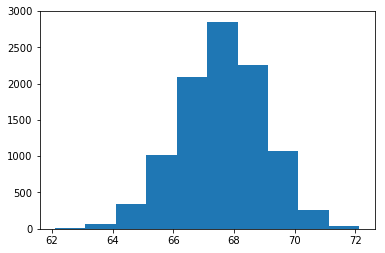

In [5]:
sampling_dist_mean5 = []

for _ in range(10000):
    sample1 = full_data.sample(5)
    sample_mean = sample1.height.mean()
    sampling_dist_mean5.append(sample_mean)
    
plt.hist(sampling_dist_mean5);

In [6]:
std_sampling_dist = np.std(sampling_dist_mean5) # the standard deviation of the sampling distribution

`3.` Using your null and alternative as set up in question 1 and the results of your sampling distribution in question 2, simulate values of the mean values that you would expect from the null hypothesis.  Use these simulated values to determine a p-value to make a decision about your null and alternative hypotheses.  Check your solution using **quiz 3** and **quiz 4** below.

**Hint:** Use the numpy documentation [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to assist with your solution.

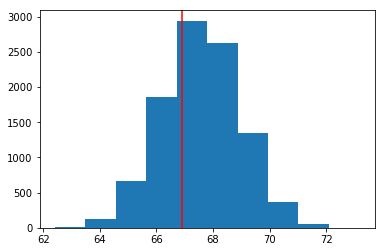

In [7]:
null_mean = 67.60

means = []
for _ in range(10000):
    means.append(sample1)

null_vals = np.random.normal(null_mean, std_sampling_dist, 10000)

plt.hist(null_vals);
plt.axvline(x=sample1.height.mean(), color = 'red'); # where our sample mean falls on null dist

In [8]:
# for a two sided hypothesis, we want to look at anything 
# more extreme from the null in both directions
obs_mean = sample1.height.mean()

# probability of a statistic lower than observed
prob_more_extreme_low = (null_vals < obs_mean).mean()
    
# probability a statistic is more extreme higher
prob_more_extreme_high = (null_mean + (null_mean - obs_mean) < null_vals).mean()

pval = prob_more_extreme_low + prob_more_extreme_high
pval

0.61539999999999995

** The above is a second possible method for obtaining the p-value.  These are pretty different, stability of these values with such a small sample size is an issue. We are essentially shading outside the lines below.**

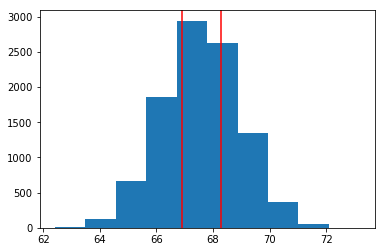

In [9]:
lower_bound = obs_mean
upper_bound = null_mean + (null_mean - obs_mean)

plt.hist(null_vals);
plt.axvline(x=lower_bound, color = 'red'); # where our sample mean falls on null dist
plt.axvline(x=upper_bound, color = 'red'); # where our sample mean falls on null dist

`4.` Now imagine if you received the same sample mean as you calculated from the sample in question 1 above, but that you actually retrieved it from a sample of 300.  What would the new standard deviation be for your sampling distribution for the mean of 300 values?  Additionally, what would your new p-value be for choosing between the null and alternative hypotheses you set up? Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram.  Use your solutions here to answer the second to last quiz question below.

**Hint:**  If you get stuck, notice you can use the solution from quiz regarding finding the p-value earlier to assist with obtaining this answer with just a few small changes.

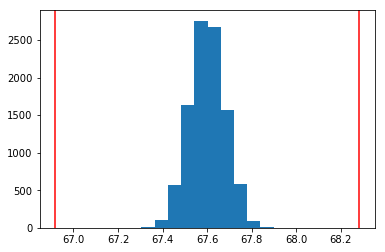

In [10]:
sampling_dist_mean1000 = []

for _ in range(10000):
    sample1 = full_data.sample(1000)
    sample_mean = sample1.height.mean()
    sampling_dist_mean1000.append(sample_mean)
    
std_sampling_dist1000 = np.std(sampling_dist_mean1000)    
null_vals = np.random.normal(null_mean, std_sampling_dist1000, 10000)

plt.hist(null_vals);
plt.axvline(x=lower_bound, color = 'red'); # where our sample mean falls on null dist
plt.axvline(x=upper_bound, color = 'red'); # where our sample mean falls on null dist

In [11]:
# for a two sided hypothesis, we want to look at anything 
# more extreme from the null in both directions

# probability of a statistic lower than observed
prob_more_extreme_low = (null_vals < lower_bound).mean()
    
# probability a statistic is more extreme higher
prob_more_extreme_high = (upper_bound < null_vals).mean()

pval = prob_more_extreme_low + prob_more_extreme_high
pval  # With such a large sample size, our sample mean that is super close is still significant
      # when the sample size is large

0.0

`5.` Reflect on what happened by answering the final quiz in this concept.

**Even with the smallest differences between a sample mean and a hypothesized population mean are significant when we have large sample sizes.**